In [88]:
import numpy as np
import matplotlib.pyplot as plt

def lorenz63(para,X):
    "next iteration for lorenz 63 model"
    sig = para[0]
    r = para[1]
    b = para[2]
    x = sig*(X[1,0]-X[0,0])
    y = r*X[0,0]-X[1,0]-X[0,0]*X[2,0]
    z = X[0,0]*X[1,0]-b*X[2,0]
    return np.array([[x],[y],[z]])

def lor63jacobian(para,Xt,vt):
    sig = para[0]
    r = para[1]
    b = para[2]
    mat = np.matmul(np.array([[-sig, sig, 0], [(r-Xt[2,0]), -1, (-Xt[0,0])], [(Xt[1,0]), (Xt[0,0]), -b]]), vt)
    return mat

def rk4dyn(para,X,dynFunc,h,total_time):
    """rk4dyn returns the evolution of dynamics for total time
    specified for an attractor written like lorenz.lorenz63"""
    for j in range(total_time-1):
        # k values
        k1 = dynFunc(para, X[:,[j]])
        k2 = dynFunc(para, X[:,[j]] + (0.5*h)*k1)
        k3 = dynFunc(para, X[:,[j]] + (0.5*h)*k2)
        k4 = dynFunc(para, X[:,[j]] + h*k3)
        # X
        X[:,[j+1]] = X[:,[j]] + (1/6)*h*(k1 + 2*k2 + 2*k3 + k4)
    return X

def rk4pert(para,h,Xt,vt,jacobianFunc):
    """rk4pert returns the one time step evolution of the
    perturbation vector in tangent space"""
    k1 = jacobianFunc(para, Xt, vt)
    k2 = jacobianFunc(para, Xt, vt + (0.5*h)*k1)
    k3 = jacobianFunc(para, Xt, vt + (0.5*h)*k2)
    k4 = jacobianFunc(para, Xt, vt + h*k3)
    return (vt + (1/6) * h * (k1 + 2*k2 + 2*k3 + k4))

def gs(para,h,nnorm,X,evolFunc,jacobianFunc):
    '''
    Calculates Lyapunov exponents and Lyapunov vectors
    using the Gram-Schmidt reorthonormalization
    for low dimensional systems that
    generally involve a solution of odes for the
    state-space evolution of dynamics
    '''
    M, n = np.shape(X)
    v = np.zeros((n+1,3,3))
    v[0,:,:] = np.identity(3)
    R = np.zeros((n+1,3,3))
    laminst = np.zeros((M,n+1))
    lamgs = np.zeros((M,1))
    print('\nCalcualting GS..\n')
    for t in range(n):
        pertVecs = evolFunc(para,h,X[:,[t]],v[t,:,:],jacobianFunc)
        v[t+1,:,:], R[t,:,:] = np.linalg.qr(pertVecs, mode='complete')
        for k in range(M):
                laminst[k,[t]] = np.log(np.abs(R[t,k,k]))
    for k in range(M):
        lamgs[k,0] = (1/(n*h))*np.sum(laminst[k,:])
    return v, R, laminst, lamgs

[[ -7.1778      -7.23619309  -7.29498414  -7.35417273  -7.41375834]
 [-12.9972     -13.09540623 -13.19397403 -13.29289229 -13.39214943]
 [ 12.533       12.59352275  12.6553616   12.71853245  12.7830512 ]]


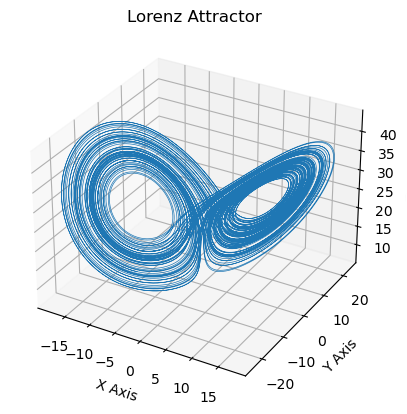

In [89]:
# lorenz parameters
sigma = 10
r = 28
b = 8/3
lorPara = np.array([sigma, r, b])

# time
total_time = 100000
deltat = 0.001
h = deltat

# intial conditions
X = np.zeros((3,total_time))
ic = np.array([[-7.1778],[-12.9972], [12.5330]])
X[:,[0]] = ic

# [m,n] = np.shape(dynamics)
# M = m*n

# k1 = lorenz63(lorPara,X[:,[0]])
# print(k1)

dynamics = rk4dyn(lorPara,X,lorenz63,h,total_time)
print(dynamics[:,0:5])

ax = plt.figure().add_subplot(projection='3d')

ax.plot(*dynamics, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

In [90]:
nnorm = 1
tnorm = nnorm*h
v, R, laminst, lamgs = gs(lorPara,h,nnorm,dynamics,rk4pert,lor63jacobian)
print(lamgs)


Calcualting GS..

[[  0.87047221]
 [  0.02535272]
 [-14.56249159]]


In [49]:
whos

Variable        Type        Data/Info
-------------------------------------
R               ndarray     100001x3x3: 900009 elems, type `float64`, 7200072 bytes (6.866523742675781 Mb)
X               ndarray     3x100000: 300000 elems, type `float64`, 2400000 bytes (2.288818359375 Mb)
ax              Axes3D      Axes3D(0.22375,0.11;0.5775x0.77)
b               float       2.6666666666666665
deltat          float       0.001
dynamics        ndarray     3x100000: 300000 elems, type `float64`, 2400000 bytes (2.288818359375 Mb)
gs              function    <function gs at 0x11a030ee0>
h               float       0.001
ic              ndarray     3x1: 3 elems, type `float64`, 24 bytes
lamgs           ndarray     3x1: 3 elems, type `float64`, 24 bytes
laminst         ndarray     3x100001: 300003 elems, type `float64`, 2400024 bytes (2.2888412475585938 Mb)
lor63jacobian   function    <function lor63jacobian at 0x10fe6ecb0>
lorPara         ndarray     3: 3 elems, type `float64`, 24 bytes
lorenz6

In [50]:
laminst

array([[-0.01      , -0.01      , -0.01      , ..., -0.01      ,
        -0.01      ,  0.        ],
       [-0.001     , -0.001     , -0.001     , ..., -0.001     ,
        -0.001     ,  0.        ],
       [-0.00266667, -0.00266667, -0.00266667, ..., -0.00266667,
        -0.00266667,  0.        ]])

In [51]:
v[0:5,:,:]

array([[[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.]],

       [[ 1.,  0.,  0.],
        [-0.,  1.,  0.],
        [-0., -0.,  1.]],

       [[ 1.,  0.,  0.],
        [-0.,  1.,  0.],
        [-0., -0.,  1.]],

       [[ 1.,  0.,  0.],
        [-0.,  1.,  0.],
        [-0., -0.,  1.]],

       [[ 1.,  0.,  0.],
        [-0.,  1.,  0.],
        [-0., -0.,  1.]]])

In [52]:
R[0:5,:,:]

array([[[0.99004983, 0.        , 0.        ],
        [0.        , 0.9990005 , 0.        ],
        [0.        , 0.        , 0.99733689]],

       [[0.99004983, 0.        , 0.        ],
        [0.        , 0.9990005 , 0.        ],
        [0.        , 0.        , 0.99733689]],

       [[0.99004983, 0.        , 0.        ],
        [0.        , 0.9990005 , 0.        ],
        [0.        , 0.        , 0.99733689]],

       [[0.99004983, 0.        , 0.        ],
        [0.        , 0.9990005 , 0.        ],
        [0.        , 0.        , 0.99733689]],

       [[0.99004983, 0.        , 0.        ],
        [0.        , 0.9990005 , 0.        ],
        [0.        , 0.        , 0.99733689]]])

In [59]:
for t in range(10):
    print(np.linalg.norm(v[t,:,1]))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [69]:
Xt = dynamics[:,[1]]
v1 = np.identity(3)
j = np.array([[-sigma, sigma, 0], [(r-Xt[2,0]), -1, (-Xt[0,0])], [(Xt[1,0]), (Xt[0,0]), -b]])
j

array([[-10.        ,  10.        ,   0.        ],
       [ 15.40647725,  -1.        ,   7.23619309],
       [-13.09540623,  -7.23619309,  -2.66666667]])

In [70]:
v1

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [71]:
j*v1

array([[-10.        ,   0.        ,   0.        ],
       [  0.        ,  -1.        ,   0.        ],
       [ -0.        ,  -0.        ,  -2.66666667]])

In [72]:
np.matmul(j,v1)

array([[-10.        ,  10.        ,   0.        ],
       [ 15.40647725,  -1.        ,   7.23619309],
       [-13.09540623,  -7.23619309,  -2.66666667]])

In [106]:
lamrunave = np.zeros((3,total_time-1))
lamrunave

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [107]:
for t in range(1,total_time):
    for k in range(3):
        lamrunave[k,t-1] = np.sum(laminst[k,0:t])/(h*t)

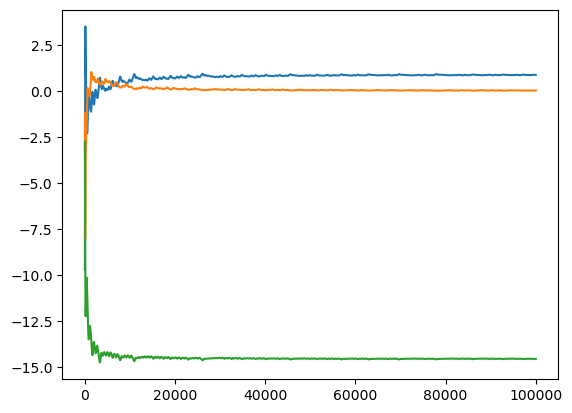

In [108]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
for i in range(3):
    ax.plot(lamrunave[i,:])
plt.show()